In [1]:
import numpy as np
import matplotlib.pyplot as plt

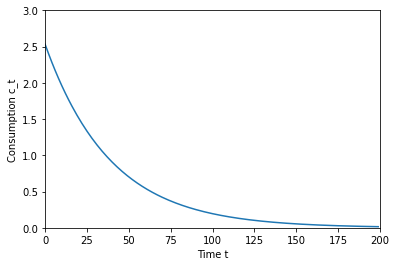

In [3]:
## Program 8.1
T = 200
a0 = 100
β = .95
γ = .5

c = np.zeros(T)
time = np.zeros(T)

for t in range(T):
    c[t] = β**(t*γ)*(1-β**γ)*a0
    time[t] = t

plt.figure()
plt.plot(time,c)
plt.ylabel('Consumption c_t')
plt.xlabel('Time t')
plt.xlim(0,200)
plt.ylim(0,3)
plt.show()

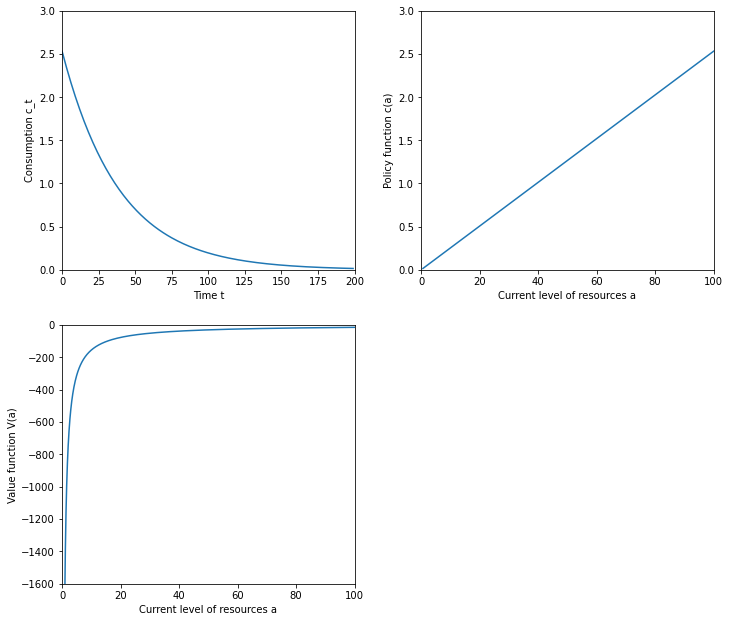

In [4]:
## Program 8.2
T = 200
a0 = 100
β = .95
γ = .5
egam = 1.0 - 1.0/γ
NA = 200

ct = np.zeros(T)
at = np.zeros(T)

at[0] = a0
ct[0] = at[0]*(1-β**γ)

for t in range(1,T):
    at[t] = at[t-1] - ct[t-1]
    ct[t] = at[t]*(1.0-β**γ)

fig, axs = plt.subplots(2,2,figsize=(10.5,9))
axs[0,0].plot(time, ct)
axs[0,0].set_ylabel('Consumption c_t')
axs[0,0].set_xlabel('Time t')
axs[0,0].set_xlim(0,200)
axs[0,0].set_ylim(0,3)

a = np.zeros(NA)
c = np.zeros(NA)
V = np.zeros(NA)

for t in range(NA):
    if t == 0:
        a[t] = a0
    else:
        a[t] = a[t-1]*β**γ
    c[t] = a[t]*(1-β**γ)
    V[t] = (1-β**γ)**(-1.0/γ)*a[t]**egam/egam
    
    
    
axs[0,1].plot(a,c)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(0,3)
axs[0,1].set_ylabel('Policy function c(a)')
axs[0,1].set_xlabel('Current level of resources a')
    

axs[1,0].plot(a,V)
axs[1,0].set_xlim(0,100)
axs[1,0].set_ylim(-1600,0)
axs[1,0].set_ylabel('Value function V(a)')
axs[1,0].set_xlabel('Current level of resources a')
    
fig.tight_layout(pad=2.0)
fig.delaxes(axs[1,1])

Iteration:  441 Difference 9.801716447838506e-07
Maximum relative consumption error is 38.49%.
CPU times: user 2min 34s, sys: 1.48 s, total: 2min 36s
Wall time: 2min 35s


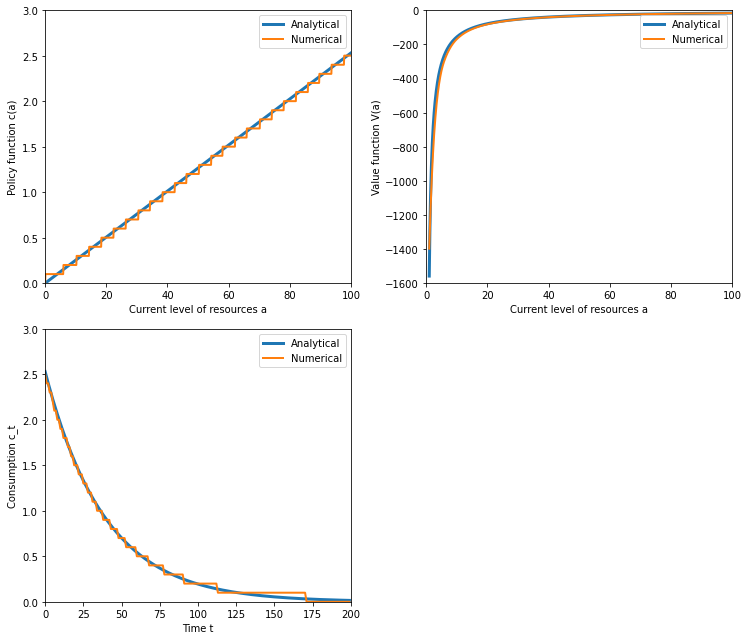

In [5]:
%%time
## Program 8.3

# Discretize the stata variable a

a0 = 100
NA = 1000
tol = 1e-6
β = .95
γ = .5
a = np.linspace(0,a0,NA)


# Fixed point iteration
itermax = 1000
V = np.zeros(NA) + 1e-4
c = np.zeros(NA)
Vnew = np.zeros(NA)
U = np.zeros(NA)
loc = np.zeros(NA,dtype=int)


for i in range(itermax+1):
    Vnew[0] = V[1] - 100.0
    c[0] = 0.0
    for v in range(1,NA):
        for t in range(v):
            cons  = a[v]-a[t]
            U[t]  = cons**egam/egam + β*V[t]
        loc[v] = np.argmax(U[:v])
        c[v] = a[v] - a[loc[v]]
        Vnew[v] = U[loc[v]]
    
    if np.max(abs((Vnew-V)/V))<tol:
        break
    else:
        V = Vnew.copy()
        
if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(abs((Vnew-V)/V)))

ct = np.zeros(T)
pos = np.zeros(T,dtype=int)
pos[0] = NA-1
ct[0] = c[-1] #Numerical
cta = np.zeros(T) # Analytical
at = np.zeros(T)

for t in range(1,T):
    pos[t] = loc[pos[t-1]]
    ct[t] = c[pos[t]]

at[0] = a0
cta[0] = a0*(1-β**γ)
for t in range(1,T):
    at[t] =  at[t-1]*β**γ
    cta[t] = at[t]*(1-β**γ)
    


fig, axs = plt.subplots(2,2,figsize=(10.5,9))


axs[0,0].plot(a, a*(1-β**γ),label = 'Analytical',linewidth = 3)
axs[0,0].plot(a, c,label = 'Numerical',linewidth = 2)
axs[0,0].set_ylabel('Policy function c(a)')
axs[0,0].set_xlabel('Current level of resources a')
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,3)
axs[0,0].legend(loc=0)


axs[0,1].plot(a[10:],(1-β**γ)**(-1.0/γ)*a[10:]**egam/egam,label = 'Analytical',linewidth = 3)
axs[0,1].plot(a[10:], V[10:],label = 'Numerical',linewidth = 2)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(-1600,0)
axs[0,1].set_ylabel('Value function V(a)')
axs[0,1].set_xlabel('Current level of resources a')
axs[0,1].legend(loc=0)

TT = np.linspace(0,T-1,T) 
axs[1,0].plot(TT, cta,label = 'Analytical',linewidth = 3)
axs[1,0].plot(TT, ct, label = 'Numerical',linewidth = 2)
axs[1,0].set_xlim(0,200)
axs[1,0].set_ylim(0,3)
axs[1,0].set_ylabel('Consumption c_t')
axs[1,0].set_xlabel('Time t')
axs[1,0].legend(loc=0)

fig.delaxes(axs[1,1])

fig.tight_layout()

err = np.zeros(NA)
for i in range(NA):
    err[i] = abs((c[i] - a[i]*(1-β**γ))/max(a[i]*(1-β**γ),1e-20))
print('Maximum relative consumption error is %2.2f%%.'%np.max(err))

In [ ]:
# Program 8.4; speed up program 8.3


# Fixed point iteration
V = np.zeros(NA) + 1e-4
c = np.zeros(NA)
Vnew = np.zeros(NA)
U = np.zeros(NA)
loc = np.zeros(NA,dtype=int)

tstart = time.time()
for i in range(itermax+1):
    loc[0] = 0
    Vnew[0] = V[1] - 100.0
    c[0] = 0.0
    for v in range(1,NA):
        loc[v] = v-1
        cons  = a[v]-a[v-1]
        Utemp  = cons**egam/egam + β*V[v-1]
        for t in range(v-2,-1,-1):
            cons  = a[v]-a[t]
            Unew  = cons**egam/egam + β*V[t]
            if Unew > Utemp:
                Utemp = Unew
                loc[v] = t
            else:
                break
        c[v] = a[v] - a[loc[v]]
        Vnew[v] = Utemp
    
    if np.max(abs((Vnew-V)/V))<tol:
        break
    else:
        V = Vnew.copy()
tend = time.time()
time_taken = tend - tstart
        
if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(abs((Vnew-V)/V)))
        print('Time taken: %2.f seconds'%time_taken)

In [ ]:
## Program 8.5
from scipy.interpolate import interp1d as interp
from scipy.optimize import minimize


γ = .5
egam = 1.0 - 1.0/γ
β = .95
a0 = 100.0
tol = 1e-6
itermax = 2000
T = 200
NA = 200
a = np.linspace(0,a0,NA)
c = np.ones(NA)
V = np.zeros(NA) + 1e-8
Vnew = np.zeros(NA)+ 1e-8
loc = np.zeros(NA)


def utility(x,index): 
    cons = max(a[index] - x, 1e-10)
    Vplus = S(x)**egam/egam
    util = -(cons**egam/egam + β*Vplus)
    return util

tstart = time.time()
for i in range(itermax+1):
    c[0] = 0.0
    Vnew[0] = V[1] - 1e+10
    S = interp(a,(egam*Vnew)**(1.0/egam),kind = 'cubic')
    for v in range(1,NA):
        x0 = a[v] - c[v]
        aplus = minimize(utiliy, x0, args = (v),bounds=[(0.0,a0)]).x
        c[v] = a[v] - aplus
        Vnew[v] = c[v]**egam/egam + β*S(aplus)**egam/egam
    if np.max(abs((Vnew-V)/V))<tol:
        break
    else:
        V = Vnew.copy()
tend = time.time()
time_taken = tend - tstart
    
    
if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(abs((Vnew-V)/V)))
        print('Time taken: %2.f seconds'%time_taken)


In [ ]:
Sc = interp(a,c,kind = 'cubic')
ct = np.zeros(T)
at = np.zeros(T)

at[0] = a0
ct[0] = Sc(at[0])

for t in range(1,T):
    at[t] = at[t-1] - ct[t-1]
    ct[t] = Sc(at[t])


fig, axs = plt.subplots(2,2,figsize=(10.5,9))


axs[0,0].plot(a, a*(1-β**γ),label = 'Analytical',linewidth = 3)
axs[0,0].plot(a, c,label = 'Numerical',linewidth = 2)
axs[0,0].set_ylabel('Policy function c(a)')
axs[0,0].set_xlabel('Current level of resources a')
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,3)
axs[0,0].legend(loc=0)


axs[0,1].plot(a[1:],(1-β**γ)**(-1.0/γ)*a[1:]**egam/egam,label = 'Analytical',linewidth = 3)
axs[0,1].plot(a[1:], V[1:],label = 'Numerical',linewidth = 2)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(-1600,0)
axs[0,1].set_ylabel('Value function V(a)')
axs[0,1].set_xlabel('Current level of resources a')
axs[0,1].legend(loc=0)

TT = np.linspace(0,T-1,T) 
axs[1,0].plot(TT, cta,label = 'Analytical',linewidth = 3)
axs[1,0].plot(TT, ct, label = 'Numerical',linewidth = 2)
axs[1,0].set_xlim(0,200)
axs[1,0].set_ylim(0,3)
axs[1,0].set_ylabel('Consumption c_t')
axs[1,0].set_xlabel('Time t')
axs[1,0].legend(loc=0)


fig.delaxes(axs[1,1])

fig.tight_layout()
err = np.zeros(NA)
for i in range(NA):
    err[i] = abs((c[i] - a[i]*(1-β**γ))/max(a[i]*(1-β**γ),1e-20))
print('Maximum relative consumption error is %2.2f%%.'%np.max(err))

In [ ]:
## Program 8.6
import numpy as np
from scipy.interpolate import interp1d as interp
from scipy.optimize import brentq


a = np.linspace(0,a0,NA)
cnew = np.zeros(len(a))

a = 1.0

c = a.copy()/2
S = interp(a,c,kind = 'cubic')

def foc(x,index):
    return a[index] - x - β**(-γ)*S(x)

tstart = time.time()
for i in range(itermax+1):
    cnew[0] = .0 + 1e-6
    
    for v in range(NA):
        x0 = a[v] - c[v]
        cnew[v] = a[v] - brentq(foc, 0 , a0, args = (v))
    
    S = interp(a,cnew,kind = 'cubic')
    if np.max(np.abs((cnew[1:]-c[1:])/c[1:])) < tol:
        break
    else:
        c = cnew.copy()
tend = time.time()
time_taken = tend - tstart

if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(np.abs((cnew[1:]-c[1:])/c[1:])))
        print('Time taken: %2.f seconds'%time_taken)     

In [ ]:
Sc = interp(a,c,kind = 'cubic')
ct = np.zeros(T)
at = np.zeros(T)

at[0] = a0
ct[0] = Sc(at[0])

for t in range(1,T):
    at[t] = at[t-1] - ct[t-1]
    ct[t] = Sc(at[t])


fig, axs = plt.subplots(2,2,figsize=(10.5,9))


axs[0,0].plot(a, a*(1-β**γ),label = 'Analytical',linewidth = 3)
axs[0,0].plot(a, c,label = 'Numerical',linewidth = 2)
axs[0,0].set_ylabel('Policy function c(a)')
axs[0,0].set_xlabel('Current level of resources a')
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,3)
axs[0,0].legend(loc=0)


axs[0,1].plot(a[1:],(1-β**γ)**(-1.0/γ)*a[1:]**egam/egam,label = 'Analytical',linewidth = 3)
axs[0,1].plot(a[1:], V[1:],label = 'Numerical',linewidth = 2)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(-1600,0)
axs[0,1].set_ylabel('Value function V(a)')
axs[0,1].set_xlabel('Current level of resources a')
axs[0,1].legend(loc=0)

TT = np.linspace(0,T-1,T) 
axs[1,0].plot(TT, cta,label = 'Analytical',linewidth = 3)
axs[1,0].plot(TT, ct, label = 'Numerical',linewidth = 2)
axs[1,0].set_xlim(0,200)
axs[1,0].set_ylim(0,3)
axs[1,0].set_ylabel('Consumption c_t')
axs[1,0].set_xlabel('Time t')
axs[1,0].legend(loc=0)


fig.delaxes(axs[1,1])

fig.tight_layout()
err = np.zeros(NA)
for i in range(NA):
    err[i] = abs((c[i] - a[i]*(1-β**γ))/max(a[i]*(1-β**γ),1e-20))
print('Maximum relative consumption error is %2.2f%%.'%np.max(err))

In [ ]:
# Program 8.7

a_endog = np.zeros(NA)
c_endog = np.zeros(NA)
a = np.linspace(0, a0, NA)
c = a.copy()/2.0

tstart = time.time()
for i in range(itermax + 1):
    a_endog[0] = .0
    c_endog[0] = .0
    
    for v in range(1,NA):
        c_endog[v] = β**(-γ) * c[v]
        a_endog[v] = a[v] + c_endog[v]
        
    S = interp(a_endog,c_endog,kind = 'cubic')
    cnew = S(a)
    if np.max(np.abs((cnew[1:]-c[1:])/c[1:])) < tol:
        break
    else:
        c = cnew.copy()
tend = time.time()
time_taken = tend - tstart
if i == itermax:
        print("!!! Results do not converge !!!")
else:
        print('Iteration: ',i,'Difference',np.max(np.abs((cnew[1:]-c[1:])/c[1:])))
        print('Time taken: %2.5f seconds'%time_taken) 
    



In [ ]:
Sc = interp(a,c,kind = 'cubic')
ct = np.zeros(T)
at = np.zeros(T)

at[0] = a0
ct[0] = Sc(at[0])

for t in range(1,T):
    at[t] = at[t-1] - ct[t-1]
    ct[t] = Sc(at[t])


fig, axs = plt.subplots(2,2,figsize=(10.5,9))


axs[0,0].plot(a, a*(1-β**γ),label = 'Analytical',linewidth = 3)
axs[0,0].plot(a, c,label = 'Numerical',linewidth = 2)
axs[0,0].set_ylabel('Policy function c(a)')
axs[0,0].set_xlabel('Current level of resources a')
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,3)
axs[0,0].legend(loc=0)


axs[0,1].plot(a[1:],(1-β**γ)**(-1.0/γ)*a[1:]**egam/egam,label = 'Analytical',linewidth = 3)
axs[0,1].plot(a[1:], V[1:],label = 'Numerical',linewidth = 2)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(-1600,0)
axs[0,1].set_ylabel('Value function V(a)')
axs[0,1].set_xlabel('Current level of resources a')
axs[0,1].legend(loc=0)

TT = np.linspace(0,T-1,T) 
axs[1,0].plot(TT, cta,label = 'Analytical',linewidth = 3)
axs[1,0].plot(TT, ct, label = 'Numerical',linewidth = 2)
axs[1,0].set_xlim(0,200)
axs[1,0].set_ylim(0,3)
axs[1,0].set_ylabel('Consumption c_t')
axs[1,0].set_xlabel('Time t')
axs[1,0].legend(loc=0)


fig.delaxes(axs[1,1])

fig.tight_layout()
err = np.zeros(NA)
for i in range(NA):
    err[i] = abs((c[i] - a[i]*(1-β**γ))/max(a[i]*(1-β**γ),1e-20))
print('Maximum relative consumption error is %2.2f%%.'%np.max(err))